In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
out_final_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\journal+doi+abstract+year+citation+fieldofstudy_dropnull.csv"

with open(out_final_p, 'r', encoding = 'utf-8', newline = '') as f:    
    data = pd.read_csv(f)

print('Number of null data: \n ', data.isnull().sum())

Number of null data: 
  Unnamed: 0          0
title               0
authors             0
venue               0
year                0
citationCount       0
fieldsOfStudy       0
abstract            0
doi                 0
query               0
database            0
publication_type    0
dtype: int64


# Year
'year'

2021    1716
2022    1119
2020     741
2019     462
2018     328
2017     239
2016     207
2015     189
2014     151
2013     139
2012     107
2010      97
2011      91
Name: year, dtype: int64


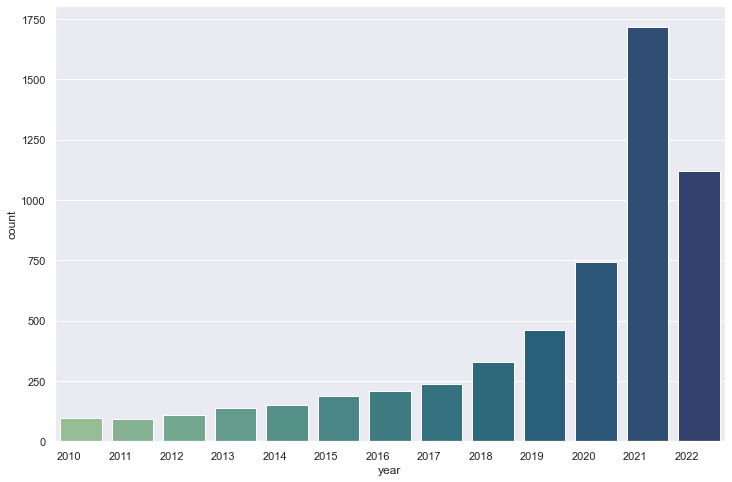

In [3]:
data['year'] = data['year'].astype('int32')
print(data['year'].value_counts())
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid") 
sns.countplot(x='year', palette = "crest", data=data) #color="salmon",
plt.xticks( ha = 'right') #rotation = 0,
plt.show()

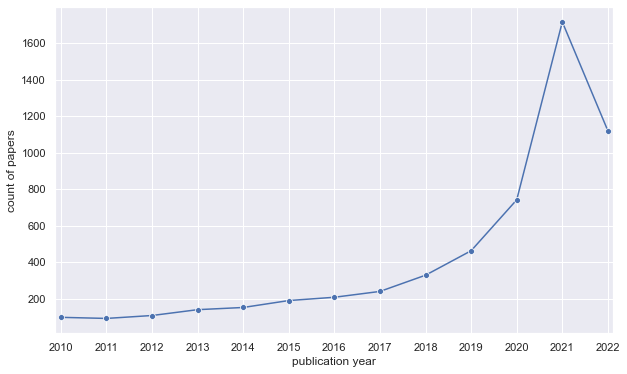

In [4]:
# line chart
count_year = {}
for item in data['year']:
    count_year[item] = count_year.get(item, 0)+1
len(count_year)
sorted_count_years = {k:v for k, v in sorted(count_year.items(), key=lambda item: item[1], reverse=True) }
df_count_year = pd.DataFrame(sorted_count_years.items(), columns = ['publication year', 'count of papers'])

plt.figure(figsize=(10,6))
# plt.bar(range(len(slice_count_fields)), list(slice_count_fields.values()), tick_label= list(slice_count_fields.keys()))
ax = sns.lineplot(x = 'publication year', y = 'count of papers', data = df_count_year, color='b', marker = 'o') #, saturation=0.70
# plt.xticks( ha = 'right') #rotation = 25,
ax.set(xticks=df_count_year['publication year'].values)
# plt.tick_params(axis='both', which='minor', labelsize=6)
plt.margins(x=0.01)
plt.show()

# Query distribution

misinformation    1498
rumor             1242
spam               807
disinformation     782
troll              677
fake+news          580
Name: query, dtype: int64


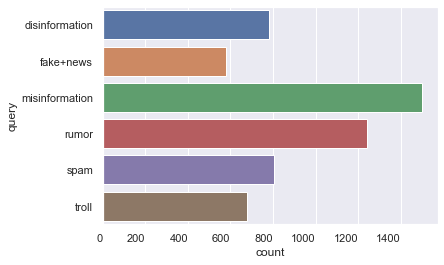

In [5]:
data['query'] = data['query'].replace('Spam', 'spam') # I forgot to normalize this bf
print(data['query'].value_counts())
sns.set_theme(style="darkgrid") 
sns.countplot(y='query', data=data)
plt.xticks(rotation = 0, ha = 'right')
plt.show()

# Database distribution

wos               2715
scopus            1589
science_direct    1282
Name: database, dtype: int64


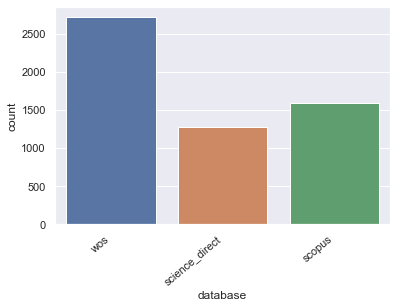

In [6]:
print(data['database'].value_counts())
sns.countplot(x='database', data=data)
plt.xticks(rotation = 40, ha = 'right')
plt.show()

# Field of study
'fieldsOfStudy'

In [7]:

count_multi = 0
all_fieldofstudy = []
for fields in data.fieldsOfStudy:
    fields = fields.replace(',', ';').replace("'", "").replace('[', '').replace(']', '')
    if len(fields.split(';'))>1:
        count_multi+=1
        all_fieldofstudy.extend(fields.split(';'))
    else:
        all_fieldofstudy.append(fields)
print(count_multi)

1278


In [8]:
all_fieldofstudy = [field.strip() for field in all_fieldofstudy]
count_fields = {}
for item in all_fieldofstudy:
    count_fields[item] = count_fields.get(item, 0)+1
len(count_fields)
n_top = 30
sorted_count_fields = {k:v for k, v in sorted(count_fields.items(), key=lambda item: item[1], reverse=True)[:n_top] }
print('the number of fields of study: ', len(sorted_count_fields))
slice_count_fields = {k:v for k, v in sorted_count_fields.items() if v>5}
print('the number of fields > 5 frequences:  ', len(slice_count_fields))
slice_count_fields

the number of fields of study:  30
the number of fields > 5 frequences:   30


{'Medicine': 1508,
 'Computer Science': 1321,
 'Psychology': 546,
 'Communication': 419,
 'Engineering': 250,
 'Political Science': 226,
 'Sociology': 186,
 'Information Science & Library Science': 182,
 'Physics': 170,
 'Mathematics': 138,
 'Government & Law': 135,
 'Telecommunications': 122,
 'Business': 109,
 'Social Sciences - Other Topics': 104,
 'Business & Economics': 99,
 'Science & Technology - Other Topics': 99,
 'History': 93,
 'Environmental Sciences & Ecology': 83,
 'Public': 71,
 'Environmental & Occupational Health': 71,
 'Chemistry': 51,
 'International Relations': 50,
 'Operations Research & Management Science': 50,
 'Linguistics': 46,
 'Materials Science': 45,
 'Geography': 45,
 'Geology': 45,
 'Arts & Humanities - Other Topics': 44,
 'Economics': 41,
 'Education & Educational Research': 36}

In [9]:
df_slice_count_fields = pd.DataFrame(slice_count_fields.items(), columns = ['field', 'count'])
with open(r'C:\Users\hn0139\Documents\GitHub\Misinformation\Data analysis\Descriptive analysis\field-of-study_freq.csv', 'w',  newline = '') as f:
    df_slice_count_fields.to_csv(f)

df_slice_count_fields

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hn0139\\Documents\\GitHub\\Misinformation\\Data analysis\\Descriptive analysis\\field-of-study_freq.csv'

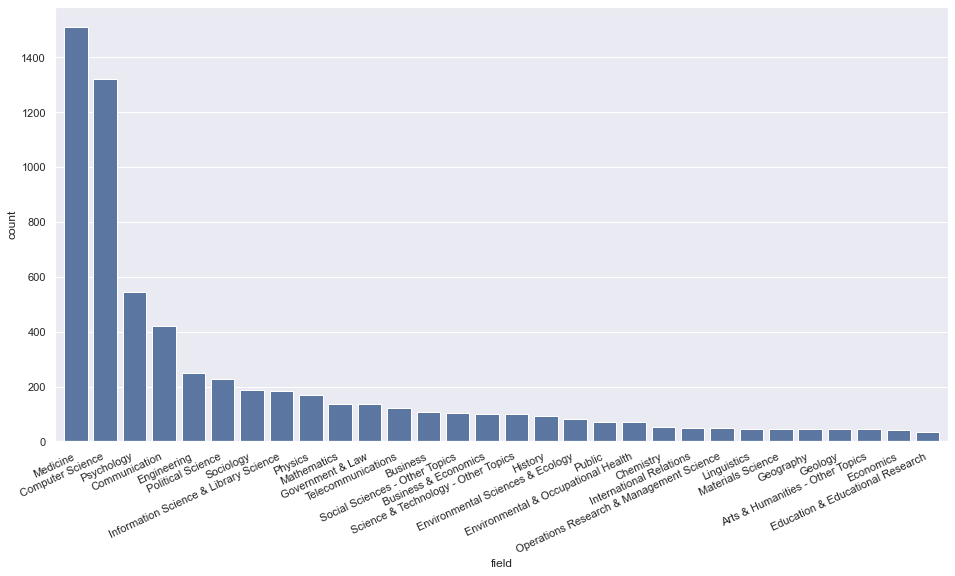

In [ ]:
plt.figure(figsize=(16,8))
# plt.bar(range(len(slice_count_fields)), list(slice_count_fields.values()), tick_label= list(slice_count_fields.keys()))
sns.barplot(x = 'field', y = 'count', data = df_slice_count_fields, color='b', saturation=0.70)
plt.xticks(rotation = 25, ha = 'right')
plt.tick_params(axis='both', which='minor', labelsize=6)
plt.margins(x=0.01)
plt.show()

# Venue (journal) distribution

 the number of unique journal names:  2401

top 100 most frequent journal:
                                                venue  count
0   physica a: statistical mechanics and its appli...     96
1                                         ieee access     83
2   international journal of environmental researc...     68
3                                             vaccine     65
4                                            plos one     58
5                         computers in human behavior     44
6                    expert systems with applications     39
7                journal of medical internet research     37
8                           procedia computer science     35
9                 information processing & management     35
10                          social science & medicine     28
11                      profesional de la informacion     26
12             personality and individual differences     25
13                               information sciences     25
14   inter

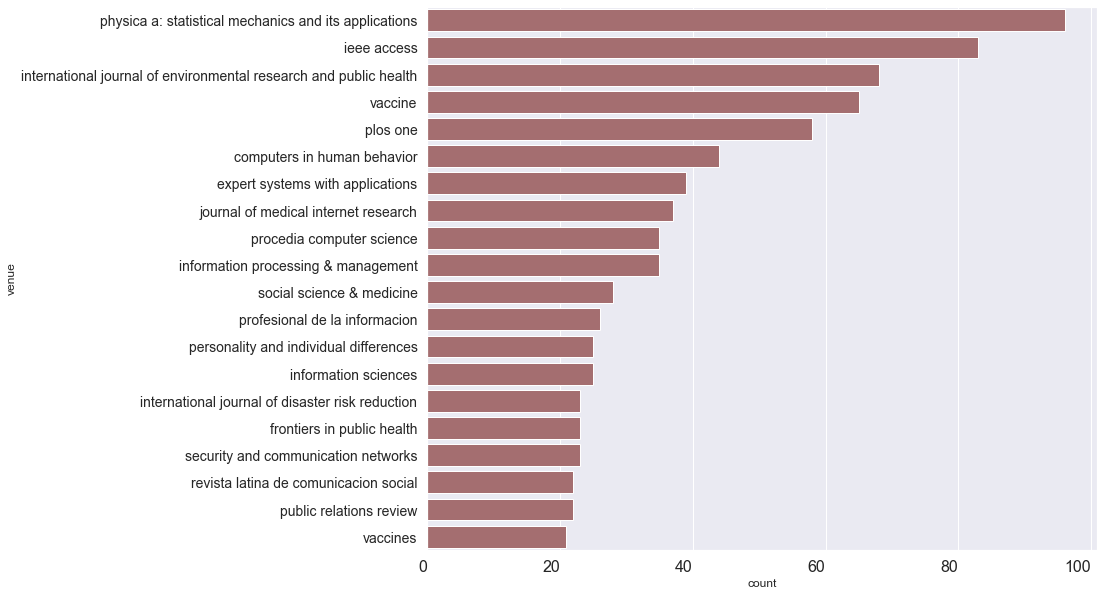

In [14]:
n = 20
data['venue'] = data['venue'].str.lower().replace('physica a-statistical mechanics and its applications', 'physica a: statistical mechanics and its applications')
venue_freq = pd.DataFrame(data['venue'].str.lower().value_counts().rename_axis('venue').reset_index(name='count'))
print(' the number of unique journal names: ', venue_freq.shape[0])
print('\ntop 100 most frequent journal:')
print(venue_freq[:n])
with open(r'C:\Users\huyen\OneDrive\Documents\GitHub\Misinformation\Data analysis\Descriptive analysis\venue_freq.csv', 'w',  newline = '') as f:
    venue_freq.to_csv(f)

plt.figure(figsize=(12,10))
# plt.bar(range(len(venue_freq[:n])), list(venue_freq['count'][:n]), tick_label= list(venue_freq['venue'][:n]))
sns.barplot(y = 'venue', x = 'count', data = venue_freq[:n], color='r', saturation=0.45)
plt.xticks( ha = 'right', fontsize = 16)
plt.yticks(  fontsize = 14)

# plt.tick_params(axis='both',  labelsize=12) #which='minor',
plt.show()

In [88]:
venue_freq['venue'][5]
# 'physica a: statistical mechanics and its applications'

'physica a-statistical mechanics and its applications'

In [18]:
unique_venue_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\uniq_journal_names.csv"
isls_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\LSIS_data.csv"
# isls_field = data[data['fieldsOfStudy'].str.strip()== 'Information Science & Library Science']
isls_field = data['fieldsOfStudy'].apply(lambda x: True if 'Information Science & Library Science' in x else False)
data_isls = data[isls_field]
with open(unique_venue_p, 'w', newline='') as f:
    venue_freq['venue'].to_csv(f)
with open(isls_p, 'w', newline='') as f:
    data_isls.to_csv(f)

# Citation count distribution

In [47]:
thresholds = [10, 30, 50, 100, 300, 500, 1000]
for threshold in thresholds:
    print(' >%s, there are %s papers.' %(str(threshold), str(data[data['citationCount']>threshold].shape[0])))



 >10, there are 1421 papers.
 >30, there are 499 papers.
 >50, there are 261 papers.
 >100, there are 94 papers.
 >300, there are 23 papers.
 >500, there are 12 papers.
 >1000, there are 3 papers.


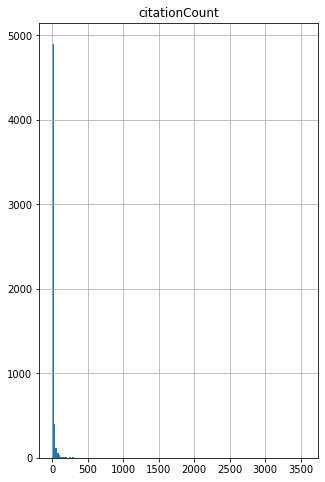

In [48]:
hist = data.hist(column = 'citationCount', bins=150, figsize=(5,8))
plt.show()

# Analysis on the LIS paper subset


In [48]:
import pandas as pd
lis_path = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\lis_data_by_journal_partial_to-code.csv"
with open(lis_path, 'r', encoding = 'utf-8') as f:
    all_lis = pd.read_csv(f)
all_lis['title'] = all_lis['title'].str.strip().str.lower()
all_lis = all_lis.sort_values(by=['title'], inplace=False)
print(all_lis.shape)
all_lis.head(5)

(172, 15)


,Unnamed: 0.1,Unnamed: 0,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type,relevancy,Unnamed: 14
126,4222,4594,a bibliometric analysis of digital literacy re...,"Baber H,Fanea-Ivanovici M,Lee YT,Tinmaz H",information and learning science,2022,1,['Medicine'],\nPurpose\nDigital literacy is not the mere ab...,10.1108/ILS-10-2021-0090,fake+news,scopus,journal,Relevant,NaN
141,4616,5090,a comparative study of bot detection technique...,"Antenore M,Camacho Rodriguez JM,Panizzi E",social science computer review,2022,0,['Medicine'],Bot Detection is crucial in a world where Onli...,10.1177/08944393211073733,misinformation,scopus,journal,Relevant,NaN
45,906,956,a cross-national diagnosis of infodemics: comp...,"Zeng, Jing; Chan, Chung-Hong",online information review,2021,11,Computer Science; Information Science & Librar...,Purpose - This study empirically investigates ...,10.1108/OIR-09-2020-0417,misinformation,wos,journal,Relevant,NaN
149,4732,5244,a deep neural networks-based fusion model for ...,"Lu HY,Yang J,Fang W,Song X,Wang C",data technologies and applications,2022,0,['Medicine'],PurposeThe COVID-19 has become a global pandem...,10.1108/DTA-06-2021-0160,rumor,scopus,journal,Relevant,NaN
72,1779,1865,a feature-centric spam email detection model u...,"Zamir, Ammara; Khan, Hikmat Ullah; Mehmood, Wa...",electronic library,2020,7,Information Science & Library Science,Purpose This research study proposes a feature...,10.1108/EL-07-2019-0181,Spam,wos,journal,Relevant,NaN


In [50]:
# Open backup coded data
coded_path = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\analysis\backup_coded-data-analysis_08282022\backup_coded-data-analysis_08282022.csv"
with open(coded_path, 'r', encoding = 'utf-8') as f:
    coded_data = pd.read_csv(f)
coded_data.columns = [i.lower() for i in coded_data.columns]
coded_data['title'] = coded_data['title'].str.strip().str.lower()
coded_data = coded_data.sort_values(by=['title'], inplace=False)
print(coded_data.shape)
coded_data['title'] = coded_data['title'].astype('str')
coded_data.head(5)

(154, 13)


,excluding?,title,url,dataset,framework/theory,research questions,research purpose,results,future direction,remarks,publication year,citation,publisher
70,No,a bibliometric analysis of digital literacy re...,https://www.emerald.com/insight/content/doi/10...,Scholarly articles,Bibliometrics,Misinformation Trend,"define misinformation,evaluating disinformatio...",The results suggest a steady rate of publicati...,future research can also look into still untap...,NaN,2022,"Baber, H., Fanea-Ivanovici, M., Lee, Y. T., & ...",Emerald
2,No,a comparative study of bot detection technique...,https://journals.sagepub.com/doi/full/10.1177/...,Twitter,Information Behaviour Theory,"Fighting Misinformation, misinformation detect...","detect misinformation,detering disinformation ...",automated accounts are numerous and active in ...,studying the sentiment with a continuous metri...,NaN,2022,"Antenore, M., Camacho Rodriguez, J. M., & Pani...",Sage
3,No,a cross-national diagnosis of infodemics: comp...,https://www.emerald.com/insight/content/doi/10...,Scholarly articles,"Cross-lingual topic model, Journalism","Misinformation Trend, Understanding misinforma...","detect misinformation,define misinformation,ev...","Analysing 3,633 fact-checked articles, this st...",future research should aim to introduce more n...,NaN,2021,"Zeng, J., & Chan, C. H. (2021). A cross-nation...",Emerald
4,No,a deep neural networks-based fusion model for ...,https://www.emerald.com/insight/content/doi/10...,Weibo,Deep Learning,misinformation detection method,"detering disinformation and misinformation,Pro...",– Experimental results on a publicly available...,"future\nwork, we would like to fuse more usefu...",NaN,2022,"Lu, H. Y., Yang, J., Fang, W., Song, X., & Wan...",Emerald
5,No,a feature-centric spam email detection model u...,https://www.emerald.com/insight/content/doi/10...,Email,feature-centric framework (FSEDM),misinformation detection method,detect misinformation,Analysis and experimental results indicated th...,Not Stated,NaN,2020,"Zamir, A., Khan, H. U., Mehmood, W., Iqbal, T....",Emerald


In [55]:
result = pd.merge(all_lis, coded_data, how="left", on=['title'])
result


,Unnamed: 0.1,Unnamed: 0,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,...,dataset,framework/theory,research questions,research purpose,results,future direction,remarks,publication year,citation,publisher
0,4222,4594,a bibliometric analysis of digital literacy re...,"Baber H,Fanea-Ivanovici M,Lee YT,Tinmaz H",information and learning science,2022,1,['Medicine'],\nPurpose\nDigital literacy is not the mere ab...,10.1108/ILS-10-2021-0090,...,Scholarly articles,Bibliometrics,Misinformation Trend,"define misinformation,evaluating disinformatio...",The results suggest a steady rate of publicati...,future research can also look into still untap...,NaN,2022.0,"Baber, H., Fanea-Ivanovici, M., Lee, Y. T., & ...",Emerald
1,4616,5090,a comparative study of bot detection technique...,"Antenore M,Camacho Rodriguez JM,Panizzi E",social science computer review,2022,0,['Medicine'],Bot Detection is crucial in a world where Onli...,10.1177/08944393211073733,...,Twitter,Information Behaviour Theory,"Fighting Misinformation, misinformation detect...","detect misinformation,detering disinformation ...",automated accounts are numerous and active in ...,studying the sentiment with a continuous metri...,NaN,2022.0,"Antenore, M., Camacho Rodriguez, J. M., & Pani...",Sage
2,906,956,a cross-national diagnosis of infodemics: comp...,"Zeng, Jing; Chan, Chung-Hong",online information review,2021,11,Computer Science; Information Science & Librar...,Purpose - This study empirically investigates ...,10.1108/OIR-09-2020-0417,...,Scholarly articles,"Cross-lingual topic model, Journalism","Misinformation Trend, Understanding misinforma...","detect misinformation,define misinformation,ev...","Analysing 3,633 fact-checked articles, this st...",future research should aim to introduce more n...,NaN,2021.0,"Zeng, J., & Chan, C. H. (2021). A cross-nation...",Emerald
3,4732,5244,a deep neural networks-based fusion model for ...,"Lu HY,Yang J,Fang W,Song X,Wang C",data technologies and applications,2022,0,['Medicine'],PurposeThe COVID-19 has become a global pandem...,10.1108/DTA-06-2021-0160,...,Weibo,Deep Learning,misinformation detection method,"detering disinformation and misinformation,Pro...",– Experimental results on a publicly available...,"future\nwork, we would like to fuse more usefu...",NaN,2022.0,"Lu, H. Y., Yang, J., Fang, W., Song, X., & Wan...",Emerald
4,1779,1865,a feature-centric spam email detection model u...,"Zamir, Ammara; Khan, Hikmat Ullah; Mehmood, Wa...",electronic library,2020,7,Information Science & Library Science,Purpose This research study proposes a feature...,10.1108/EL-07-2019-0181,...,Email,feature-centric framework (FSEDM),misinformation detection method,detect misinformation,Analysis and experimental results indicated th...,Not Stated,NaN,2020.0,"Zamir, A., Khan, H. U., Mehmood, W., Iqbal, T....",Emerald
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,855,903,"we want to do more, but ... : new jersey publi...","Paris, Britt; Carmien, Kathleen; Marshall, Mic...",library & information science research,2022,0,Information Science & Library Science,External disciplinary fields and popular disco...,10.1016/j.lisr.2022.101157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,2794,2935,who do you trust? the digital destruction of s...,Bunker D,international journal of information management,2020,72,['Medicine'],Developments in centrally managed communicatio...,10.1016/j.ijinfomgt.2020.102201,...,Website content,Communication Theory,"Misinformation Trend, Misinformation spread, U...","Measuring Impact of Misinformation,define misi...",Individual user profiles are produced by platf...,Not Stated,NaN,2020.0,"Bunker, D. (2020). Who do you trust? The digit...",Science Direct
169,4797,5330,why people spread rumors on social media: deve...,"Shen YC,Lee CT,Pan LY,Lee CY",online information review,2021,5,"['Sociology', 'Computer Science']",PurposeDealing with online rumors or fake info...,10

In [62]:
merged_out_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\analysis\backup_coded-data-analysis_08282022\backup_coded-data-analysis_08282022_merged-metadata.csv"
with open(merged_out_p, 'w', newline = '', encoding = 'utf-8') as f:
    result.to_csv(f)

In [8]:
# Open the merged file for analysis
import pandas as pd
merged_out_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\analysis\backup_coded-data-analysis_08282022\backup_coded-data-analysis_08282022_merged-metadata.csv"

with open(merged_out_p, 'r', encoding = 'utf-8', errors='ignore') as f:
    merged = pd.read_csv(f)
print(merged.shape)
merged.head()

(155, 22)


,Unnamed: 0,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,...,relevancy,url,dataset,framework/theory,research questions,research purpose,results,future direction,remarks,citation
0,0,a bibliometric analysis of digital literacy re...,"Baber H,Fanea-Ivanovici M,Lee YT,Tinmaz H",information and learning science,2022,1,['Medicine'],\nPurpose\nDigital literacy is not the mere ab...,10.1108/ILS-10-2021-0090,fake+news,...,Relevant,https://www.emerald.com/insight/content/doi/10...,Scholarly articles,Bibliometrics,Misinformation Trend,"define misinformation,evaluating disinformatio...",The results suggest a steady rate of publicati...,future research can also look into still untap...,NaN,"Baber, H., Fanea-Ivanovici, M., Lee, Y. T., & ..."
1,1,a comparative study of bot detection technique...,"Antenore M,Camacho Rodriguez JM,Panizzi E",social science computer review,2022,0,['Medicine'],Bot Detection is crucial in a world where Onli...,10.1177/08944393211073733,misinformation,...,Relevant,https://journals.sagepub.com/doi/full/10.1177/...,Twitter,Information Behaviour Theory,"Fighting Misinformation, misinformation detect...","detect misinformation,detering disinformation ...",automated accounts are numerous and active in ...,studying the sentiment with a continuous metri...,NaN,"Antenore, M., Camacho Rodriguez, J. M., & Pani..."
2,2,a cross-national diagnosis of infodemics: comp...,"Zeng, Jing; Chan, Chung-Hong",online information review,2021,11,Computer Science; Information Science & Librar...,Purpose - This study empirically investigates ...,10.1108/OIR-09-2020-0417,misinformation,...,Relevant,https://www.emerald.com/insight/content/doi/10...,Scholarly articles,"Cross-lingual topic model, Journalism","Misinformation Trend, Understanding misinforma...","detect misinformation,define misinformation,ev...","Analysing 3,633 fact-checked articles, this st...",future research should aim to introduce more n...,NaN,"Zeng, J., & Chan, C. H. (2021). A cross-nation..."
3,3,a deep neural networks-based fusion model for ...,"Lu HY,Yang J,Fang W,Song X,Wang C",data technologies and applications,2022,0,['Medicine'],PurposeThe COVID-19 has become a global pandem...,10.1108/DTA-06-2021-0160,rumor,...,Relevant,https://www.emerald.com/insight/content/doi/10...,Weibo,Deep Learning,misinformation detection method,"detering disinformation and misinformation,Pro...",– Experimental results on a publicly available...,"future\nwork, we would like to fuse more usefu...",NaN,"Lu, H. Y., Yang, J., Fang, W., Song, X., & Wan..."
4,4,a feature-centric spam email detection model u...,"Zamir, Ammara; Khan, Hikmat Ullah; Mehmood, Wa...",electronic library,2020,7,Information Science & Library Science,Purpose This research study proposes a feature...,10.1108/EL-07-2019-0181,Spam,...,Relevant,https://www.emerald.com/insight/content/doi/10...,Email,feature-centric framework (FSEDM),misinformation detection method,detect misinformation,Analysis and experimental results indicated th...,Not Stated,NaN,"Zamir, A., Khan, H. U., Mehmood, W., Iqbal, T...."


In [11]:
merged.venue.value_counts()
venue_freq = pd.DataFrame(merged['venue'].str.lower().value_counts().rename_axis('LIS journal').reset_index(name='count'))
# print(' the number of unique journal names: ', venue_freq.shape[0])
with open(r'C:\Users\huyen\OneDrive\Documents\GitHub\Misinformation\Data analysis\Descriptive analysis\LIS_journals_freq.csv', 'w',  newline = '') as f:
    venue_freq.to_csv(f)

# plt.figure(figsize=(18,14))
# # plt.bar(range(len(venue_freq[:n])), list(venue_freq['count'][:n]), tick_label= list(venue_freq['venue'][:n]))
# sns.barplot(y = 'venue', x = 'count', data = venue_freq[:n], color='r', saturation=0.45)
# plt.xticks( ha = 'right', fontsize = 16)
# plt.yticks(  fontsize = 14)

# # plt.tick_params(axis='both',  labelsize=12) #which='minor',
# plt.show()
venue_freq

,LIS journal,count
0,publications,16
1,government information quarterly,9
2,journal of information science,8
3,international journal of information management,8
4,journal of the association for information sci...,8
...,...,...
57,transinformacao,1
58,journal of data and information science,1
59,medical reference services quarterly,1
60,education for information,1
